In [95]:
import pandas as pd
from IPython.display import display

In [96]:
import numpy as np
import fasttext
from huggingface_hub import hf_hub_download

In [97]:
path = hf_hub_download("facebook/fasttext-el-vectors", "model.bin")
model = fasttext.load_model(path)

In [98]:
with open("clustering_texts.txt", "r") as f:
	texts = [line.strip() for line in f.readlines()]

In [99]:
print("Calculating word vectors for texts...")
vecs = [
	model.get_word_vector(text) for text in texts
]
# calculate pair-wise embedding affinity and distance by using numpy

vecs = np.array(vecs)
if vecs.ndim == 1:
	vecs = vecs.reshape(1, -1)  # Ensure vecs is 2D for pairwise calculations
else:
	vecs = vecs.reshape(len(vecs), -1)
# Calculate cosine similarity and euclidean distances
X = np.vstack(vecs)  # shape: (N, D)
# Compute the L2 norms for each row
norms = np.linalg.norm(X, axis=1)  # shape: (N,)
# Outer product of norms to get all pairwise norm products
norm_matrix = np.outer(norms, norms)  # shape: (N, N)
# Dot product of all vectors with each other
dot_products = X @ X.T  # shape: (N, N)
# Cosine affinity (similarity) matrix
cosine_affinity = dot_products / norm_matrix

Calculating word vectors for texts...


In [100]:
display(pd.DataFrame(cosine_affinity, index=texts, columns=texts))

,Τέλος διαχείρισης λογαριασμού όψεως,Τέλος συνδρομής λογαριασμού ταμιευτηρίου,Τέλος έκδοσης βιβλιαρίου καταθέσεων,Τέλος χρήσης κάρτας ATM,Τέλος έκδοσης κάρτας debit,Τέλος ετήσιας συνδρομής χρεωστικής κάρτας,Τέλος ετήσιας συνδρομής πιστωτικής κάρτας,Τέλος διαχείρισης ηλεκτρονικής τραπεζικής,Τέλος χρήσης υπηρεσίας SMS Banking,Τέλος χρήσης υπηρεσίας Mobile Banking,...,Χρέωση διαχείρισης διαχείρισης collateral,Χρέωση διαχείρισης βεβαίωσης λήξης λογαριασμού,Χρέωση διαχείρισης βεβαίωσης έναρξης λογαριασμού,Χρέωση διαχείρισης βεβαίωσης ταυτότητας λογαριασμού,Χρέωση διαχείρισης προσαρμογής επιτοκίου,Χρέωση διαχείρισης βεβαίωσης ιστορικού πληρωμών,Χρέωση διαχείρισης βεβαίωσης δανειακής σύμβασης,Χρέωση διαχείρισης βεβαίωσης μη απώλειας εγγράφων,Χρέωση διαχείρισης βεβαίωσης εγγραφής σε blacklist,Χρέωση διαχείρισης επανασύνδεσης κάρτας
Τέλος διαχείρισης λογαριασμού όψεως,0.999999,0.700040,0.623239,0.638525,0.703949,0.677364,0.659848,0.729900,0.690691,0.677042,...,0.656361,0.727013,0.756056,0.742675,0.656062,0.684322,0.701291,0.705020,0.652776,0.659530
Τέλος συνδρομής λογαριασμού ταμιευτηρίου,0.700040,1.000000,0.709911,0.590621,0.629179,0.762767,0.737498,0.585182,0.647969,0.652649,...,0.417171,0.655957,0.657081,0.685764,0.608002,0.556832,0.591993,0.570540,0.517005,0.527248
Τέλος έκδοσης βιβλιαρίου καταθέσεων,0.623239,0.709911,1.000000,0.636911,0.723561,0.695827,0.689097,0.557912,0.631742,0.614776,...,0.418852,0.589648,0.609253,0.625234,0.595891,0.614216,0.578785,0.615435,0.540810,0.559424
Τέλος χρήσης κάρτας ATM,0.638525,0.590621,0.636911,1.000000,0.710682,0.640503,0.645580,0.539728,0.796818,0.788508,...,0.341116,0.436682,0.457347,0.501446,0.440638,0.485380,0.469776,0.456591,0.399609,0.542316
Τέλος έκδοσης κάρτας debit,0.703949,0.629179,0.723561,0.710682,1.000000,0.737743,0.732281,0.648566,0.669282,0.698359,...,0.483676,0.554763,0.595764,0.596669,0.587165,0.591605,0.625429,0.604727,0.531009,0.592505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Χρέωση διαχείρισης βεβαίωσης ιστορικού πληρωμών,0.684322,0.556832,0.614216,0.485380,0.591605,0.663733,0.666362,0.673792,0.591156,0.592952,...,0.780420,0.850343,0.865234,0.830919,0.827713,1.000000,0.856470,0.898390,0.831114,0.809646
Χρέωση διαχείρισης βεβαίωσης δανειακής σύμβασης,0.701291,0.591993,0.578785,0.469776,0.625429,0.725280,0.717971,0.701164,0.566671,0.592899,...,0.781768,0.864217,0.888221,0.877360,0.814333,0.856470,1.000000,0.860820,0.857075,0.820539
Χρέωση διαχείρισης βεβαίωσης μη απώλειας εγγράφων,0.705020,0.570540,0.615435,0.456591,0.604727,0.670195,0.654995,0.679988,0.572325,0.582176,...,0.802609,0.885318,0.890128,0.851703,0.812530,0.898390,0.860820,1.000000,0.864632,0.795846
Χρέωση διαχείρισης βεβαίωσης εγγραφής σε blacklist,0.652776,0.517005,0.540810,0.399609,0.531009,0.642245,0.624385,0.600214,0.529752,0.548750,...,0.795661,0.866311,0.869023,0.849104,0.776642,0.831114,0.857075,0.864632,1.000000,0.772134



Agglomerative_k3 clusters:
Cluster 0: ['Τέλος διαχείρισης λογαριασμού όψεως', 'Τέλος συνδρομής λογαριασμού ταμιευτηρίου', 'Τέλος έκδοσης βιβλιαρίου καταθέσεων', 'Τέλος ετήσιας συνδρομής χρεωστικής κάρτας', 'Τέλος ετήσιας συνδρομής πιστωτικής κάρτας', 'Τέλος διαχείρισης ηλεκτρονικής τραπεζικής', 'Τέλος χρήσης υπηρεσίας SMS Banking', 'Τέλος χρήσης υπηρεσίας Mobile Banking', 'Τέλος αλλαγής στοιχείων επικοινωνίας', 'Τέλος επικαιροποίησης στοιχείων πελάτη', 'Τέλος έκδοσης εκτυπώσιμου αντιγράφου κίνησης', 'Τέλος διατραπεζικής πληρωμής SEPA', 'Τέλος διαχείρισης άτοκης περιόδου πιστωτικής κάρτας', 'Τέλος χρεώσεων υπερανάληψης', 'Τέλος διακοπής κάρτας (blocked card)', 'Τέλος έκδοσης επιστολής υπόλοιπου χρέους', 'Τέλος έκδοσης πιστοποιητικού φορολογικής ενημερότητας', 'Τέλος έκδοσης πιστοποιητικού υπολοίπου', 'Τέλος έκδοσης αντίγραφου λογαριασμού', 'Τέλος φυσικής επιβεβαίωσης υπογραφής', 'Τέλος διαχείρισης πάγιας εντολής', 'Τέλος επιβεβαίωσης ληξιπρόθεσμης οφειλής', 'Τέλος επαναξιολόγησης πιστο

,method,text,cluster
0,Agglomerative_k3,Τέλος διαχείρισης λογαριασμού όψεως,0
1,Agglomerative_k3,Τέλος συνδρομής λογαριασμού ταμιευτηρίου,0
2,Agglomerative_k3,Τέλος έκδοσης βιβλιαρίου καταθέσεων,0
3,Agglomerative_k3,Τέλος χρήσης κάρτας ATM,2
4,Agglomerative_k3,Τέλος έκδοσης κάρτας debit,2
...,...,...,...
3995,HDBSCAN,Χρέωση διαχείρισης βεβαίωσης ιστορικού πληρωμών,164
3996,HDBSCAN,Χρέωση διαχείρισης βεβαίωσης δανειακής σύμβασης,63
3997,HDBSCAN,Χρέωση διαχείρισης βεβαίωσης μη απώλειας εγγράφων,208
3998,HDBSCAN,Χρέωση διαχείρισης βεβαίωσης εγγραφής σε black...,98


,Method,Time (s)
0,Agglomerative_k3,0.037070
1,Agglomerative_k4,0.036182
2,DBSCAN_0.5,0.011164
3,HDBSCAN,0.283081


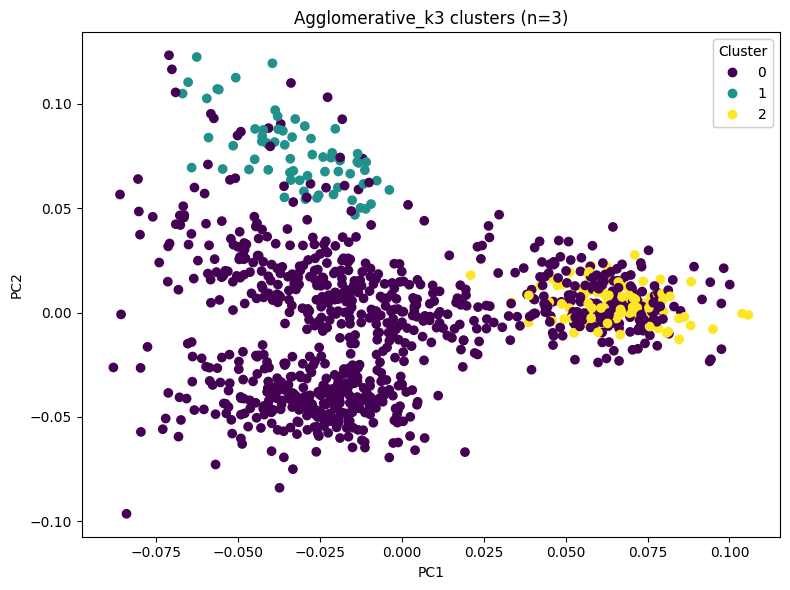

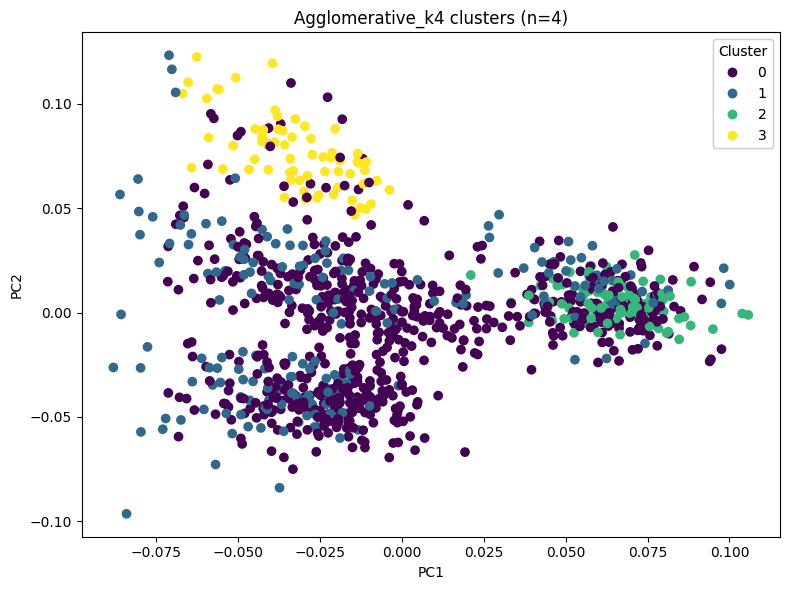

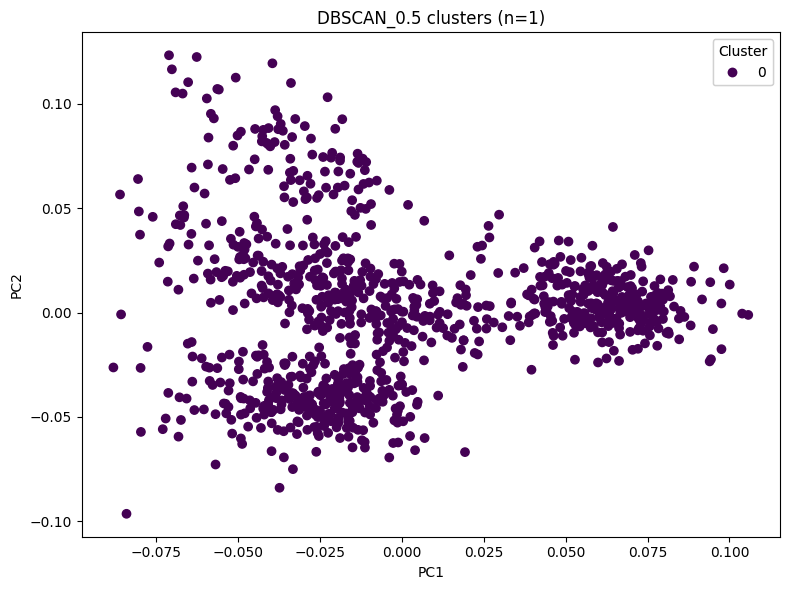

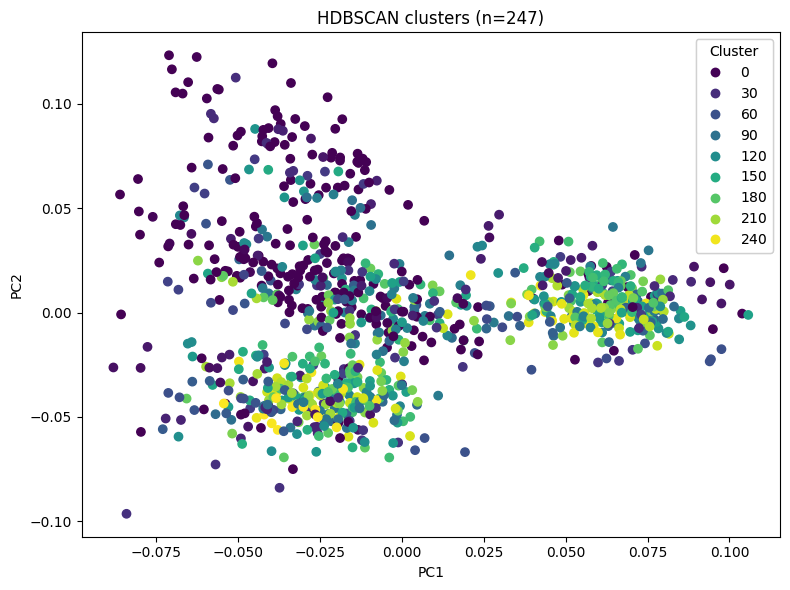

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN
from sklearn.decomposition import PCA

# Assume 'texts' and 'vecs' are already defined from your FastText model
# texts: list of strings, vecs: numpy array of shape (N, D)

# Define clustering methods to explore
clusterers = {
    'DBSCAN_0.5': DBSCAN(eps=0.5, min_samples=2),
    "HDBSCAN": HDBSCAN(min_cluster_size=2, metric='euclidean'),
}

# Container for results
results = []
# gather timing for each clustering method
import time
clustering_benchmark = {}

for name, model in clusterers.items():
    start_time = time.time()
    labels = model.fit_predict(vecs)
    end_time = time.time()
    clustering_benchmark[name] = end_time - start_time
    for text, label in zip(texts, labels):
        results.append({'method': name, 'text': text, 'cluster': label})

# display the elements of each cluster
for name, model in clusterers.items():
    labels = model.fit_predict(vecs)
    unique_labels = np.unique(labels)
    print(f"\n{name} clusters:")
    for label in unique_labels:
        cluster_texts = [texts[i] for i in range(len(texts)) if labels[i] == label]
        print(f"Cluster {label}: {cluster_texts}")

# Create DataFrame of cluster assignments
df = pd.DataFrame(results)
display(df)
display(pd.DataFrame(clustering_benchmark.items(), columns=['Method', 'Time (s)']))

# For visualization: reduce to 2D with PCA
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(vecs)

# Plot scatter with labels for each method
for name, model in clusterers.items():
    labels = df[df['method'] == name]['cluster'].values
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter = ax.scatter(coords[:, 0], coords[:, 1], c=labels)
    ax.set_title(f"{name} clusters (n={len(np.unique(labels))})")
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    # Annotate each point with its text
    # for (x, y), txt in zip(coords, texts):
    #     ax.text(x, y, txt, fontsize=8, alpha=0.7, ha='right')
    # Add legend for cluster colors
    legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
    ax.add_artist(legend1)
    plt.tight_layout()
    plt.show()
